In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

In [3]:
iris_df =pd.read_csv('iris.csv')
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## compute sepal and petal area

In [4]:
area_sepal = iris_df['sepal.length']*   iris_df['sepal.width']
area_petal = iris_df['petal.length']*   iris_df['petal.width']

area_sepal_df = pd.DataFrame(area_sepal, columns=['sepal.area'])
area_petal_df = pd.DataFrame(area_petal, columns=['petal.area'])

variety = iris_df.loc[:, ['variety']].copy()

iris_area_df = pd.concat([area_sepal_df, area_petal_df, variety], axis=1) 
iris_area_df 

,sepal.area,petal.area,variety
0,17.85,0.28,Setosa
1,14.70,0.28,Setosa
2,15.04,0.26,Setosa
3,14.26,0.30,Setosa
4,18.00,0.28,Setosa
...,...,...,...
145,20.10,11.96,Virginica
146,15.75,9.50,Virginica
147,19.50,10.40,Virginica
148,21.08,12.42,Virginica


## Describe the df


In [5]:
iris_df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Split into x and y

In [6]:
x = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]
x

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## split into train and test sets

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size= 0.3,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

(105,)

In [26]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 105 samples 
test set size: 45 samples


## Normalize the dataset before training

In [27]:
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test)

In [34]:
normalized_x_train

array([[0.76923077, 0.30769231, 0.53846154, 0.15384615],
       [0.70610474, 0.3258945 , 0.59747324, 0.1955367 ],
       [0.68914871, 0.33943145, 0.58629069, 0.25714504],
       [0.72712585, 0.26661281, 0.60593821, 0.18178146],
       [0.71414125, 0.26647062, 0.61821183, 0.19185884],
       [0.76185188, 0.34011245, 0.53057542, 0.14964948],
       [0.73154399, 0.28501714, 0.57953485, 0.21851314],
       [0.72634846, 0.38046824, 0.54187901, 0.18446945],
       [0.76521855, 0.33391355, 0.52869645, 0.15304371],
       [0.73122464, 0.31338199, 0.56873028, 0.20892133],
       [0.72366005, 0.32162669, 0.58582004, 0.17230001],
       [0.67054118, 0.34211284, 0.61580312, 0.23263673],
       [0.72965359, 0.28954508, 0.57909015, 0.22005426],
       [0.76701103, 0.35063361, 0.51499312, 0.15340221],
       [0.71653899, 0.3307103 , 0.57323119, 0.22047353],
       [0.71524936, 0.40530797, 0.53643702, 0.19073316],
       [0.80846584, 0.52213419, 0.26948861, 0.03368608],
       [0.69052512, 0.32145135,

Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

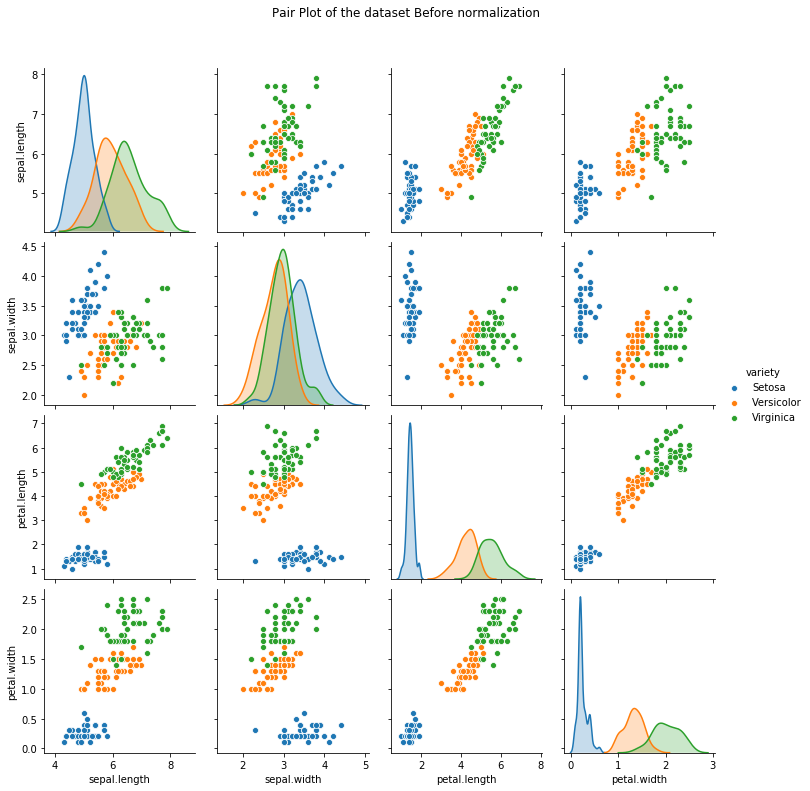

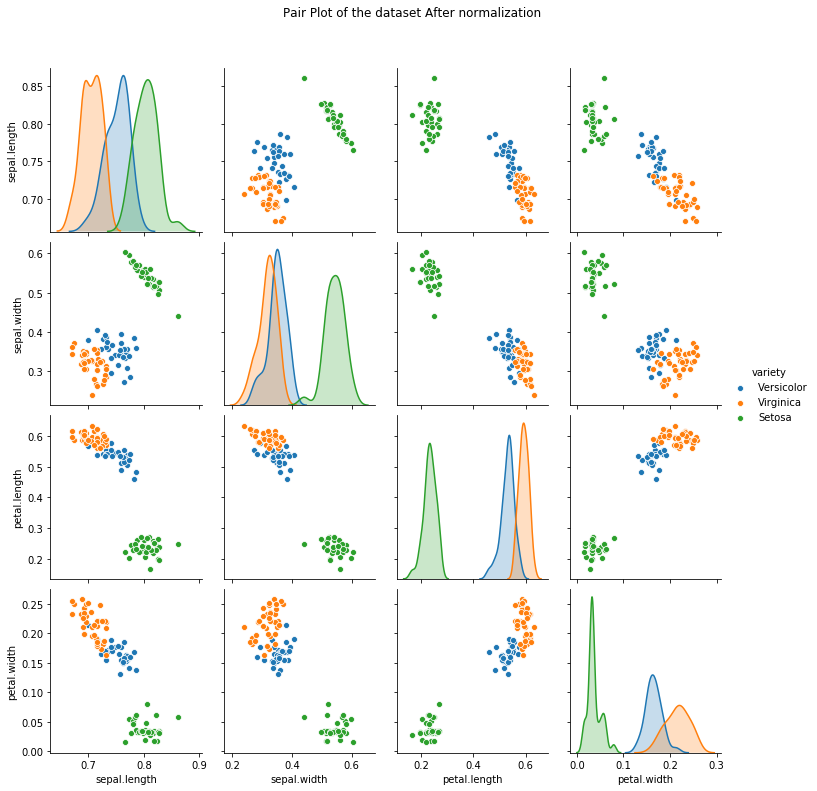

In [38]:
variety_di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before = sns.pairplot(iris_df.replace({'variety': variety_di}), hue= 'variety')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

iris_df_2 = pd.DataFrame(data=np.c_[normalized_x_train, y_train], columns=iris_df.columns)
after = sns.pairplot(iris_df_2.replace({'variety': variety_di}), hue= 'variety')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

In [40]:
K = 3
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred = knn.predict(normalized_x_test)
print(y_pred)

['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Virginica'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica'
 'Virginica' 'Setosa' 'Virginica' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Setosa']


## calculate the accuracy score

In [41]:
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')

The accuracy score is: 0.9333333333333333


## Confusion matrix

In [42]:
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]


## Compare real values and predicted values

In [43]:
comp_df = pd.DataFrame({'Real-v': y_test, 'pred-v': y_pred})
comp_df.tail()

,Real-v,pred-v
40,Virginica,Virginica
41,Setosa,Setosa
42,Virginica,Virginica
43,Setosa,Setosa
44,Setosa,Setosa


## Sepal and Petal Area

In [15]:
area_x = iris_area_df.iloc[:, :-1]
area_y = iris_area_df.iloc[:, -1]

In [16]:
area_x_train, area_x_test, area_y_train, area_y_test = train_test_split(area_x, area_y, test_size=0.3,
                                                                       shuffle=True, random_state=0)

In [17]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 105 samples 
test set size: 45 samples


In [18]:
area_scaler= Normalizer().fit(area_x_train) # the scaler is fitted to the training set
area_normalized_x_train= area_scaler.transform(area_x_train) # the scaler is applied to the training set
area_normalized_x_test= area_scaler.transform(area_x_test)

In [19]:
# knn = KNeighborsClassifier(K)
knn = KNeighborsClassifier(K)
knn.fit(area_normalized_x_train, area_y_train)
area_y_pred = knn.predict(area_normalized_x_test)
print(area_y_pred)

['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Setosa']


In [20]:
print(confusion_matrix(y_test, area_y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [21]:
comp_area_df = pd.DataFrame({'Real-v': area_y_test, 'pred-v': area_y_pred})
comp_area_df.head()

,Real-v,pred-v
114,Virginica,Virginica
62,Versicolor,Versicolor
33,Setosa,Setosa
107,Virginica,Virginica
7,Setosa,Setosa
